In [1]:
import pandas as pd

In [2]:
# The path to our CSV file
kick_starter_clean = "resources/kickstarterData.csv"
# Read our Kickstarter data into pandas
kick_starter_df = pd.read_csv("resources/kickstarterData.csv")
kick_starter_df

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions
0,1645666704,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",The Class Act Players Theatre Company Presents...,The Class Act Players put on another one of th...,1500.0,2925.0,successful,the-class-act-players-theatre-company-presents...,False,US,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
1,874638240,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",MR INCREDIBLE by Camilla Whitehill - VAULT Fes...,"A brand new play about love and entitlement, b...",2500.0,2936.0,successful,mr-incredible-by-camilla-whitehill-vault-festival,False,GB,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
2,247074984,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",RUN,Yonni's pissed off in a world filled with scho...,1000.0,1200.0,successful,run-10,False,GB,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
3,1941196813,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",9th International Meeting of Youth Theatre sap...,27. April bis 1. Mai 2016 in Brixen/Südtirol/I...,2000.0,2135.0,successful,9th-international-meeting-of-youth-theatre-sap...,False,IT,...,"{""country"":""IT"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
4,421961595,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Get Conti to the Ed Fringe!,The Italia Conti 2nd years are going to Ed Fri...,1000.0,1250.0,successful,get-conti-to-the-ed-fringe,False,GB,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,540294599,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Bring Love's Labour's Lost to Minnesota,"The birth-child of The Moving Company, Theatre...",25000.0,25388.0,successful,bring-loves-labours-lost-to-minnesota,False,US,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
4116,2002992094,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Score,Score is a musical play inspired by true stori...,300.0,340.0,successful,score,False,GB,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
4117,1064742320,"{""small"":""https://ksr-ugc.imgi

In [7]:
# Get a list of all of our columns for easy reference
columns = kick_starter_df.columns
columns


Index(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency', 'currency_symbol',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'is_starrable', 'backers_count',
       'static_usd_rate', 'usd_pledged', 'creator', 'location', 'category',
       'profile', 'spotlight', 'urls', 'source_url', 'friends', 'is_starred',
       'is_backing', 'permissions'],
      dtype='object')

In [10]:
# Extract "name", "goal", "pledged", "state", "country", "staff_pick",
# "backers_count", and "spotlight"
kickstarter_name = kick_starter_df["name"]
kickstarter_goal = kick_starter_df["goal"]
kickstarter_pledged = kick_starter_df["pledged"]
kickstarter_state = kick_starter_df["state"]
kickstarter_country = kick_starter_df["country"]
kickstarter_staff_pick = kick_starter_df["staff_pick"]
kickstarter_backers = kick_starter_df["backers_count"]
kickstarter_spotlight = kick_starter_df["spotlight"]

kickstarter_new_df = kick_starter_df[["name", "goal", "pledged", "state", "country", "staff_pick","backers_count", "spotlight"]]
kickstarter_new_df.head()

,name,goal,pledged,state,country,staff_pick,backers_count,spotlight
0,The Class Act Players Theatre Company Presents...,1500.0,2925.0,successful,US,False,17,True
1,MR INCREDIBLE by Camilla Whitehill - VAULT Fes...,2500.0,2936.0,successful,GB,True,15,True
2,RUN,1000.0,1200.0,successful,GB,False,30,True
3,9th International Meeting of Youth Theatre sap...,2000.0,2135.0,successful,IT,False,24,True
4,Get Conti to the Ed Fringe!,1000.0,1250.0,successful,GB,False,28,True


In [14]:
# Remove projects that made no money at all **FILTER**

kickstarter_new_df[kickstarter_new_df["pledged"] >0].min()

name             " City Of Autism"   " We Grow Geniuses "
goal                                                    1
pledged                                                 1
state                                            canceled
country                                                AT
staff_pick                                          False
backers_count                                           1
spotlight                                           False
dtype: object

In [13]:
# use the querery method to filter - ########
kickstarter_new_df.query("pledged>0").min()

name             " City Of Autism"   " We Grow Geniuses "
goal                                                    1
pledged                                                 1
state                                            canceled
country                                                AT
staff_pick                                          False
backers_count                                           1
spotlight                                           False
dtype: object

In [25]:
hosted_in_us = kickstarter_new_df.query("country == 'US'").head()
hosted_in_us.head()

,name,goal,pledged,state,country,staff_pick,backers_count,spotlight,avg_pledge_per_backer,average_donation
0,The Class Act Players Theatre Company Presents...,1500.0,2925.0,successful,US,False,17,True,172.058824,172.058824
8,Forefront Festival 2015,7200.0,7230.0,successful,US,False,68,True,106.323529,106.323529
11,Hamlet the Hip-Hopera,9747.0,10103.0,successful,US,True,132,True,76.537879,76.537879
14,Pride Con,15000.0,15110.0,successful,US,False,60,True,251.833333,251.833333
15,En Garde Arts Emerging Artists Festival BOSSS,10000.0,10306.0,successful,US,True,80,True,128.825000,128.825000


In [ ]:
# Collect only those projects that were hosted in the US
# Create a list of the columns
# Create a new df for "US" with the columns above. 

In [26]:
# Create a new column that finds the average amount pledged to a project (They want average per person)
hosted_in_us["average_donation"] = hosted_in_us["pledged"] / hosted_in_us["backers_count"]
hosted_in_us.head()


,name,goal,pledged,state,country,staff_pick,backers_count,spotlight,avg_pledge_per_backer,average_donation
0,The Class Act Players Theatre Company Presents...,1500.0,2925.0,successful,US,False,17,True,172.058824,172.058824
8,Forefront Festival 2015,7200.0,7230.0,successful,US,False,68,True,106.323529,106.323529
11,Hamlet the Hip-Hopera,9747.0,10103.0,successful,US,True,132,True,76.537879,76.537879
14,Pride Con,15000.0,15110.0,successful,US,False,60,True,251.833333,251.833333
15,En Garde Arts Emerging Artists Festival BOSSS,10000.0,10306.0,successful,US,True,80,True,128.825000,128.825000


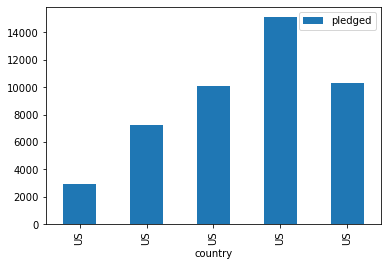

In [28]:
import matplotlib.pyplot as plt
hosted_in_us.plot(kind = "bar", x = "country", y = "pledged")
plt.show()

In [29]:
help(hosted_in_us.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p

In [ ]:
# First convert "average_donation", "goal", and "pledged" columns to float 
# USE astype() pass in type you want (float) in this case. astype(float)




# Then Format to go to two decimal places, include a dollar sign, and use comma notation

In [ ]:
# Calculate the total number of backers for all US projects

In [ ]:
# Calculate the average number of backers for all US projects

In [ ]:
# Collect only those US campaigns that have been picked as a "Staff Pick"

In [ ]:
# Group by the state of the campaigns and see if staff picks matter (Seems to matter quite a bit)

In [ ]:
#### REDUCE FUNCTION #####

In [30]:
from functools import reduce

In [31]:
values = [1, 2, 3, 4, 5]
def add(x, y):
    return x + y

reduce(add, values)

15